# K Nearest Neighbors

In [2]:
# %load ~/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



### KNN

Is a *Classification* algorithm - works to divide elements into clustered groups

Training Algorithm: 
1. Store all the Data

Prediction Algorithm:
1. Calculate the distance from x to all points in your data
2. Sort the points in your data by increasing distance from X
3. Predict the Majority label of the "K" closest points.

Choosing a K will affect what class a new point is assigned to. 

![K Nearest Neighbors K examples](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)


**Pros**  
-Very simple  
-Training is trivial  
-Works with any number of classes  
-Easy to add more data  
-Few parameters:  
1. K  
2. Distance Metric 

**Cons**  
-High prediction cost (worse for larger data sets)  
-Not good with high dimensional data  
-Categorical Features don't work well  




In [4]:

## Read in Data
df = pd.read_csv("Classified Data", index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


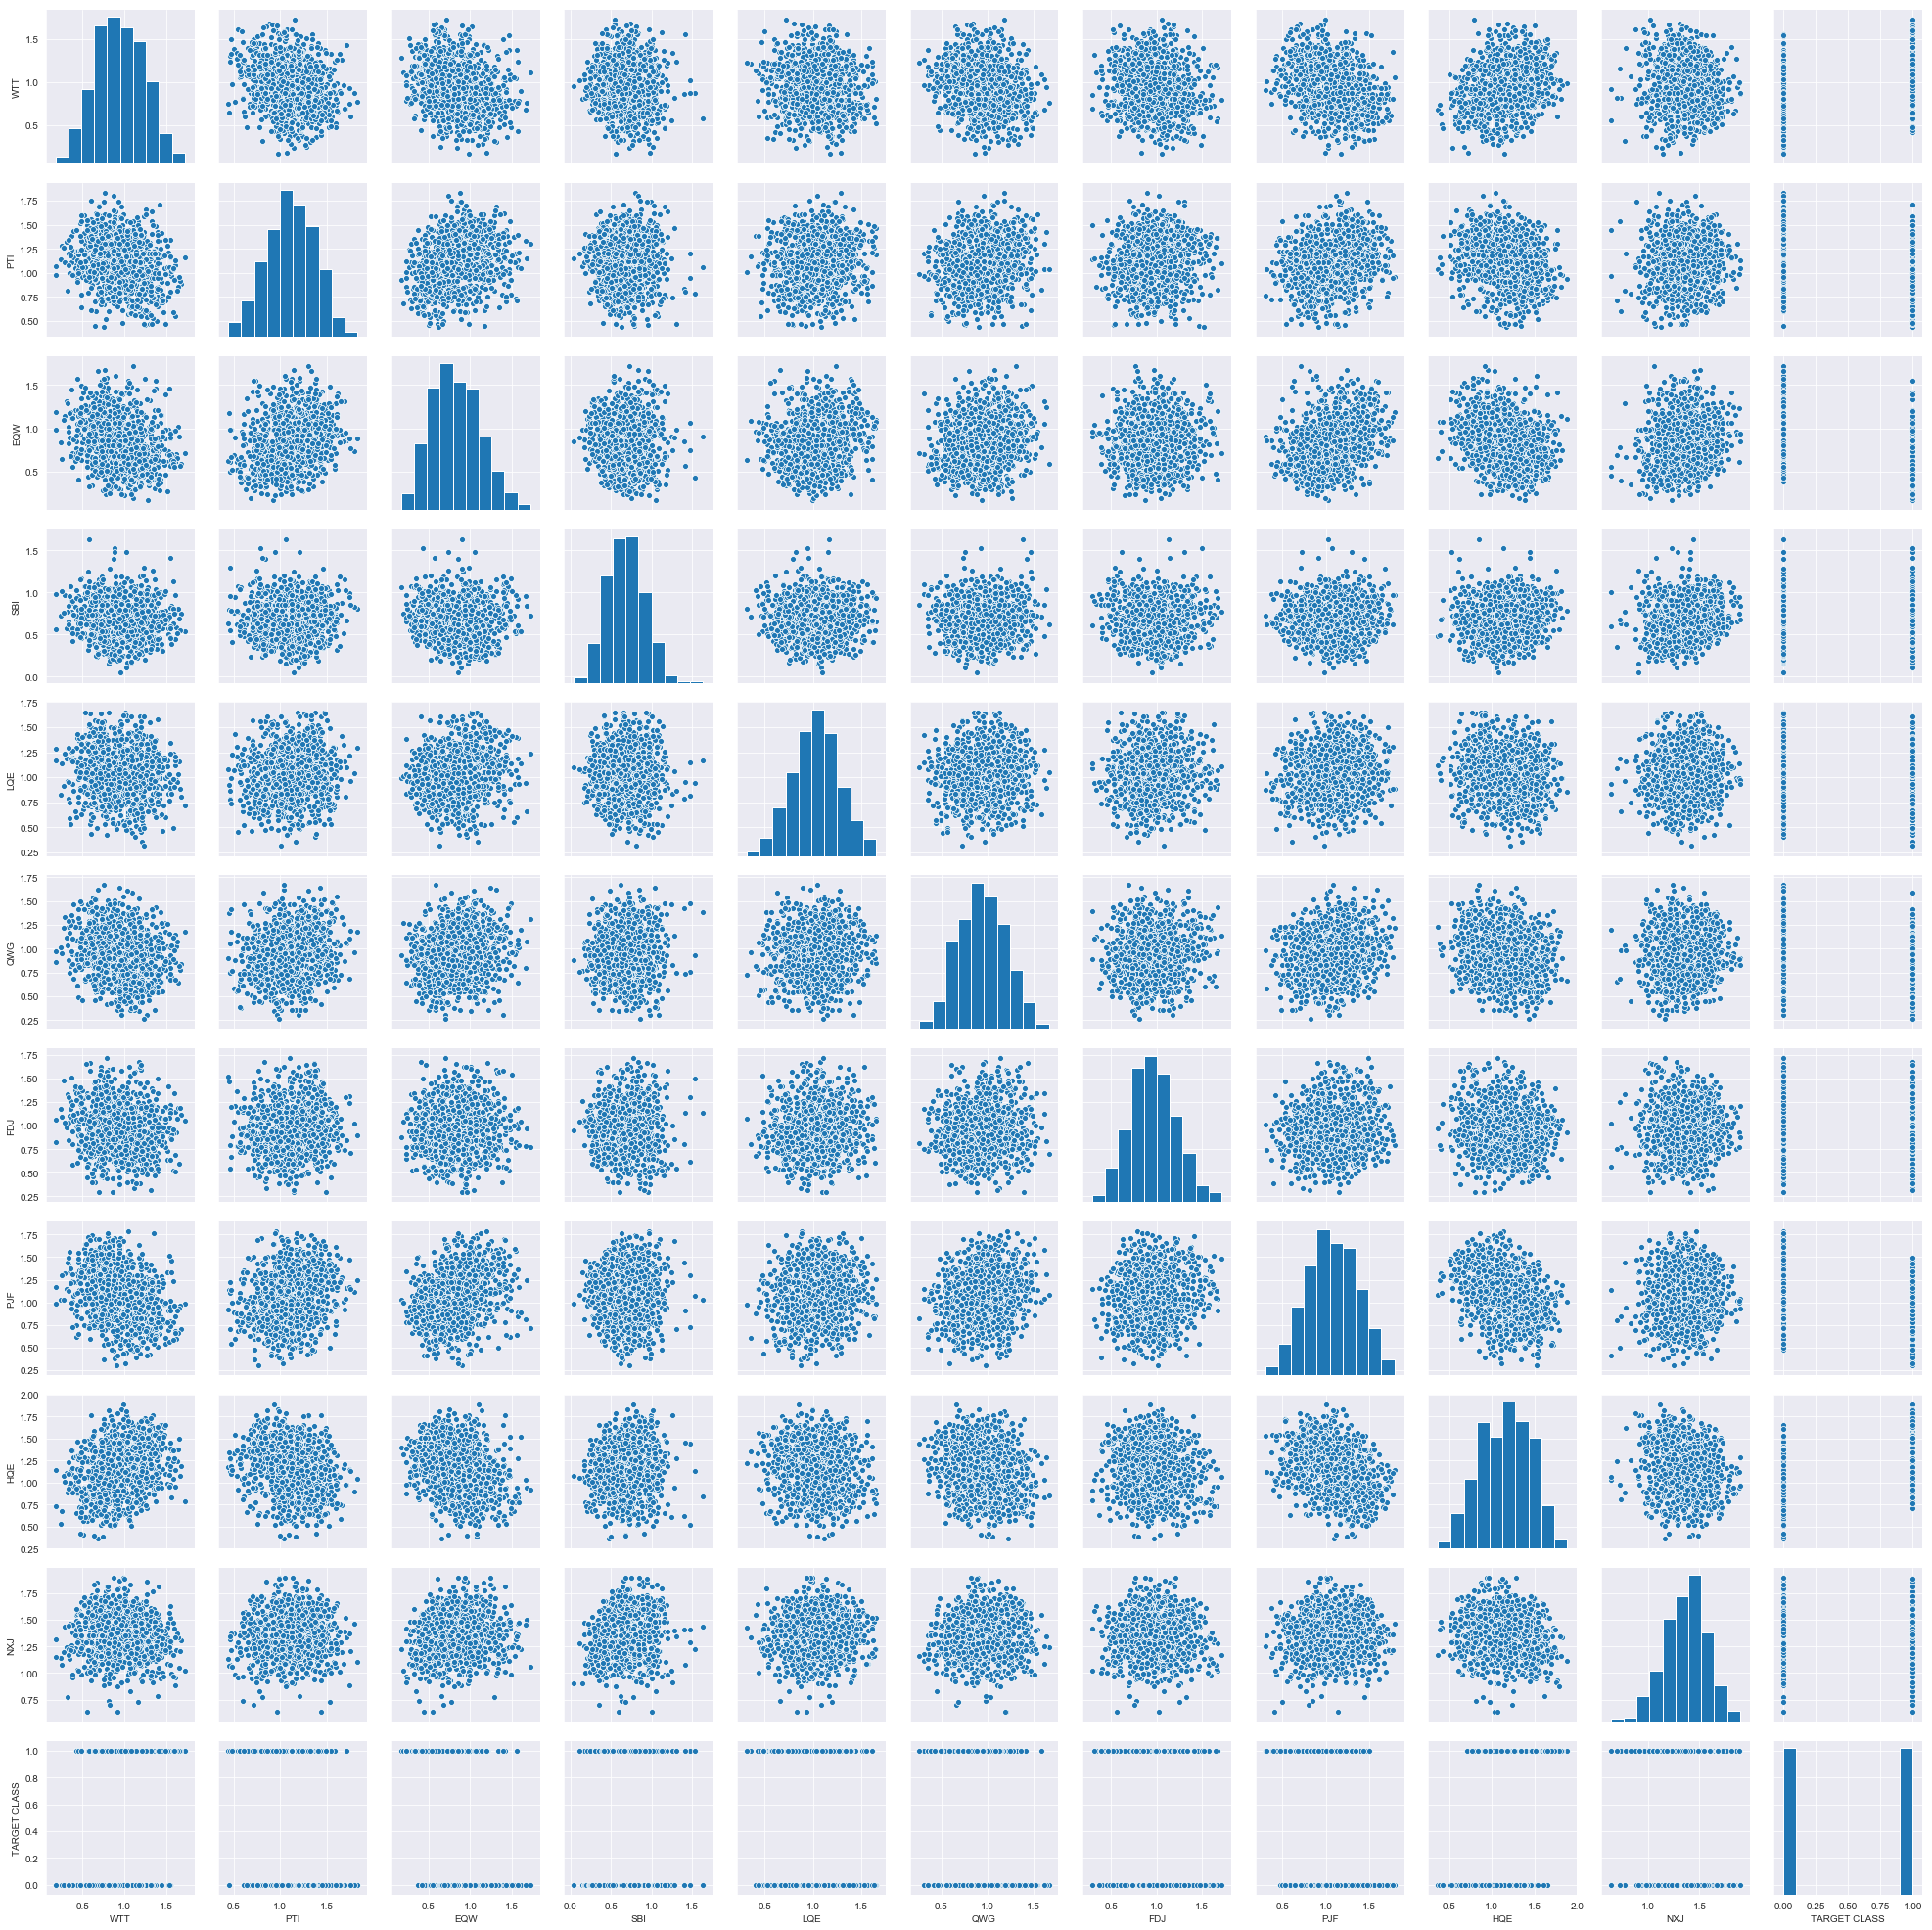

In [48]:
sns.pairplot(df)

We can't tell what the columns represent - we can presume they're just random letters, but we know what we want to use them to predict a target class as 1 or 0.

Because KNN makes its prediction of a test observation based on the observations next to it, the scale of the variable matters a lot. *Any variables on a large scale will have an effect on the distance of the observations.*  

**Because of this when you use KNN as a classifier, you want to classify the numbers to the same scale.**


In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


SciKit has a number of tools to help do this


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# create an instance for standardscaler
scaler = StandardScaler()

**Fit to the data, not the Target Class**  
Don't forget to use axis=1 to indicate the column

In [11]:
# This will fit all the data except the column TARGET CLASS
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

*scaler.transform* will perform the standardization by centering and scaling

In [12]:
# Need to pass in the data again
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
# Produces an array of the scaled values of the values from the dataframe
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
# How to create a list of the columns without the TARGET CLASS using slice notation
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [20]:
# Create a Feature dataframe. set the columns as those from the original dataframe, except TARGET CLASS
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [22]:
# This is now a dataframe with the standardized scale of the original data
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Now this can be put into an ML algorithm like KNN, since it depends on the *Distance* of each feature.

### Prepare the Train/Test Split

Here we'll just use k value as 1 as a demo without optimization

In [23]:
# set input vars
X = df_feat
y = df['TARGET CLASS']

In [24]:
# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
# Import the correct model 
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
# perform the fit
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
# Make predictions
predictions = knn.predict(X_test)

In [31]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [35]:
# Check out the Classification Report
# we see that Precision and Recall are over 90%, which is good
# Compare this against the Elbow method to see if we get improvement
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [36]:
# Check out the Confusion Matrix
confusion_matrix(y_test,predictions)

array([[151,   8],
       [ 15, 126]])

**Elbow Method**  

Using the *Elbow Method* to determine which K value is best.  
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

This will use many models for many k values and see which has the lowest error rate

In [38]:
# Will take a little time to run
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #The average where the predictions weren't equal to test values
    


**The results**

Higher K values perform generally better than the lower K values. 

The difference between .3 and .5 is very small. Adjustments could be hyperoptimizing. 

Picking "17" is a good choice for results, though we could say '34 or '36' or '37', also

**Lower is better for Error Rate**

Text(0, 0.5, 'Error Rate')

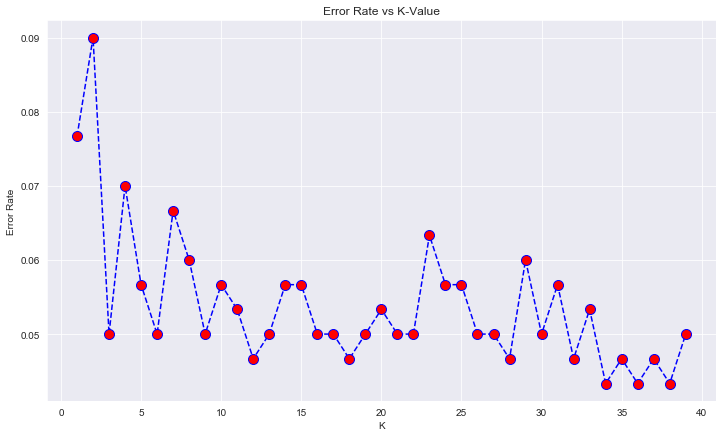

In [45]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Run again with Optimized K Value of 17

We can see that the new model has improved precision, recall and f1-score.
Higher is better for Precision, Recall and f1-score

precision    recall  f1-score   support  
0       0.91      0.95      0.93       159  

vs  
precision    recall  f1-score   support
0       0.94      0.96      0.95       159


This comes with the cost of running the models, plotting them and evaluating them, but it does produce results.



In [46]:
# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=17)
# perform the fit
knn.fit(X_train,y_train)
# Make predictions
predictions = knn.predict(X_test)

# Printing results
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[153   6]
 [  9 132]]
